# Project 2


# Movie Genre Classification

Classify a movie genre based on its plot.

<img src="moviegenre.png"
     style="float: left; margin-right: 10px;" />




https://www.kaggle.com/c/miia4200-20191-p2-moviegenreclassification/overview


### Data

Input:
- movie plot

Output:
Probability of the movie belong to each genre


### Evaluation

- 20% API
- 30% Create a solution using with a Machine Learning algorithm - Presentation (5 slides)
- 50% Performance in the Kaggle competition (Normalized acording to class performance in the private leaderboard)


### Acknowledgements

We thank Professor Fabio Gonzalez, Ph.D. and his student John Arevalo for providing this dataset.

See https://arxiv.org/abs/1702.01992

## Sample Submission

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
dataTraining = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [3]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [4]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


### Create y

In [5]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])
print(y_genres.shape)
y_genres

(7895, 24)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

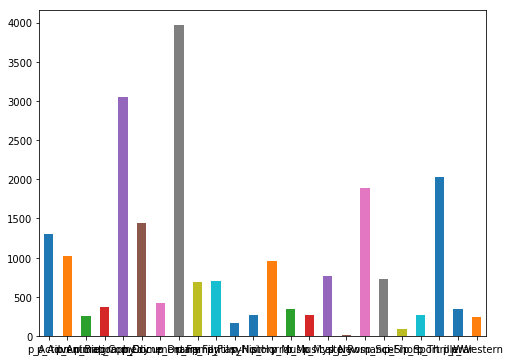

In [9]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']
train_DFY = pd.DataFrame(y_genres, columns=cols)
pd.Series(train_DFY.sum().plot(kind = "bar",figsize=(8,6),rot = 0))

# Graficar en lineas cada genero por año

# Build the features
### Create count vectorizer


In [10]:
# We should include in the features data frame year and title
dataTraining2 = dataTraining.drop(['genres','rating'], axis=1).head()
dataTraining2

,year,title,plot
3107,2003,Most,most is the story of a single father who takes...
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi..."
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi..."
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h..."


In [11]:
#vect = CountVectorizer(max_features=1000)
#vect = CountVectorizer(ngram_range=(1, 3),stop_words='english', max_features=500000)
vect = CountVectorizer(stop_words='english', min_df=2)
X_dtm = vect.fit_transform(dataTraining['plot'])
#X_dtm = vect.fit_transform(dataTraining[['plot','title']].values)
X_dtm.shape
# lasr shape = (7895, 38370)

(7895, 20677)

In [12]:
from nltk.stem.snowball import SnowballStemmer
# initialize stemmer
stemmer = SnowballStemmer('english')
words = list(vect.vocabulary_.keys())[:100]
print([stemmer.stem(word) for word in words])

['stori', 'singl', 'father', 'take', 'year', 'old', 'son', 'work', 'railroad', 'bridg', 'tender', 'day', 'boy', 'meet', 'woman', 'board', 'train', 'drug', 'abus', 'goe', 'engin', 'room', 'tell', 'stay', 'edg', 'nearbi', 'lake', 'ship', 'come', 'lift', 'suppos', 'arriv', 'hour', 'later', 'happen', 'see', 'tri', 'warn', 'abl', 'just', 'oncom', 'approach', 'fall', 'gear', 'work', 'attempt', 'lower', 'leav', 'horrif', 'choic', 'lower', 'gear', 'crush', 'peopl', 'complet', 'oblivi', 'fact', 'die', 'tri', 'save', 'addict', 'happen', 'look', 'window', 'movi', 'end', 'man', 'wander', 'new', 'citi', 'longer', 'hold', 'small', 'babi', 'relev', 'narrat', 'run', 'parallel', 'femal', 'meet', 'climax', 'tumultu', 'film', 'serial', 'killer', 'decid', 'teach', 'secret', 'satisfi', 'career', 'video', 'store', 'clerk', 'sweden', 'blackmail', 'facial', 'scar', 'gentleman', 'live', 'mean']


In [13]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
# assume every word is a noun
print([wordnet_lemmatizer.lemmatize(word) for word in words])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ivandario.gomez\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['story', 'single', 'father', 'take', 'year', 'old', 'son', 'work', 'railroad', 'bridge', 'tender', 'day', 'boy', 'meet', 'woman', 'boarding', 'train', 'drug', 'abuser', 'go', 'engine', 'room', 'tell', 'stay', 'edge', 'nearby', 'lake', 'ship', 'come', 'lifted', 'supposed', 'arrive', 'hour', 'later', 'happens', 'see', 'try', 'warn', 'able', 'just', 'oncoming', 'approach', 'fall', 'gear', 'work', 'attempting', 'lower', 'leaving', 'horrific', 'choice', 'lower', 'gear', 'crushing', 'people', 'completely', 'oblivious', 'fact', 'died', 'trying', 'save', 'addict', 'happened', 'look', 'window', 'movie', 'end', 'man', 'wandering', 'new', 'city', 'longer', 'holding', 'small', 'baby', 'relevant', 'narrative', 'run', 'parallel', 'female', 'meet', 'climax', 'tumultuous', 'film', 'serial', 'killer', 'decides', 'teach', 'secret', 'satisfying', 'career', 'video', 'store', 'clerk', 'sweden', 'blackmailer', 'facial', 'scar', 'gentleman', 'life', 'mean']


In [130]:
# assume every word is a verb
print([wordnet_lemmatizer.lemmatize(word,pos='v') for word in words])

['story', 'single', 'father', 'take', 'year', 'old', 'son', 'work', 'railroad', 'drawbridge', 'bridge', 'tender', 'day', 'boy', 'meet', 'woman', 'board', 'train', 'drug', 'abuser', 'go', 'engine', 'room', 'tell', 'stay', 'edge', 'nearby', 'lake', 'ship', 'come', 'lift', 'suppose', 'arrive', 'hour', 'later', 'happen', 'see', 'try', 'warn', 'able', 'just', 'oncoming', 'approach', 'fall', 'gear', 'work', 'attempt', 'lower', 'leave', 'horrific', 'choice', 'lower', 'gear', 'crush', 'people', 'completely', 'oblivious', 'fact', 'die', 'try', 'save', 'addict', 'happen', 'look', 'window', 'movie', 'end', 'man', 'wander', 'new', 'city', 'longer', 'hold', 'small', 'baby', 'relevant', 'narratives', 'run', 'parallel', 'female', 'meet', 'climax', 'tumultuous', 'film', 'serial', 'killer', 'decide', 'teach', 'secrets', 'satisfy', 'career', 'video', 'store', 'clerk', 'sweden', 'blackmailer', 'disfigure', 'facial', 'scar', 'gentleman']


In [ ]:
split_into_lemmas

In [14]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]
    
    
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas, stop_words='english')
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

KeyboardInterrupt: 

In [245]:
#print(vect.get_feature_names()[50000:50100])

In [16]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

### Train multi-class multi-label model

In [ ]:
# Cross validation to find the best depth parameter 
max_depth_range = range(8, 30, 2)
RMSE_scores_featu = []

for depth in max_depth_range:
    clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=300, max_depth=depth, random_state=42))
    RMSE_scores_featu.append(cross_val_score(clf, X_train, y_train_genres, cv=3, scoring='roc_auc').mean())

best_maxdepth = max_depth_range[RMSE_scores_featu.index(max(RMSE_scores_featu))]
print ("best_maxdepth: ", best_maxdepth)
plt.plot(max_depth_range, RMSE_scores_featu)
plt.xlabel('MAX FEATURES')
plt.ylabel('NEG_RMSE')

In [ ]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=5000, max_depth=25, random_state=42))
clf.fit(X_train, y_train_genres)

In [156]:
y_pred_genres = clf.predict_proba(X_test)

In [157]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')
#Alejandro: 0.7812262183677007
#Kaggle: 0.8305484760297258
#last: 0.8326580849755998

0.8326580849755998

## xgboost

In [257]:

#Cross validarion on train dataset
params = {"objective":"multi:softprob",
          #'colsample_bytree': 0.3,
          #'learning_rate': 0.1,
          'nthread': 4,
          'eval_metric':'auc',
          #'alpha': 10,
          'num_class': 24,
          'max_depth': 25}

data_dmatrix_train = xgb.DMatrix(data=X_train, label=y_train_genres)
data_dmatrix_test = xgb.DMatrix(X_test)

In [258]:
X_train.toarray().shape

(5289, 34629)

In [269]:
cv_results = xgb.cv(dtrain=data_dmatrix_train, params=params, nfold=3,
                    num_boost_round=100, early_stopping_rounds=20, as_pandas=True, 
                    stratified=True, seed=42)
cv_results


XGBoostError: b'[11:41:37] C:\\Users\\Administrator\\Desktop\\xgboost\\src\\metric\\rank_metric.cc:95: Check failed: preds.Size() == info.labels_.Size() (84624 vs. 3526) label size predict size not match'

In [270]:

#cvresult = xgb.cv(params, data_dmatrix_train, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds, metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
 

In [ ]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

In [232]:
#Cross validarion on train dataset
params2 = {"objective":"multi:softprob",
          #'colsample_bytree': 0.3,
          #'learning_rate': 0.1,
          #'alpha': 10,
          'num_class': 24,
          'max_depth': 25}

# Train the model
xg_clf2 = xgb.train(params=params2, dtrain=data_dmatrix_train, num_boost_round=300)
#xg_clf = OneVsRestClassifier(xgb.XGBClassifier(objective ='binary:logistic', max_depth = 25, n_estimators = 300))
#xg_clf.fit(X_train, y_train_genres)

In [233]:
y_pred_xgboost = xg_clf2.predict(data_dmatrix_test)
y_pred_xgboost

array([[9.3349069e-01, 6.1789237e-02, 2.1454737e-04, ..., 2.1454737e-04,
        2.1454737e-04, 2.1454737e-04],
       [8.9693356e-01, 9.8561123e-02, 2.0478897e-04, ..., 2.0478897e-04,
        2.0478897e-04, 2.0478897e-04],
       [9.4869822e-01, 4.5392025e-02, 2.6862265e-04, ..., 2.6862265e-04,
        2.6862265e-04, 2.6862265e-04],
       ...,
       [8.4972900e-01, 1.4259130e-01, 3.4907527e-04, ..., 3.4907527e-04,
        3.4907527e-04, 3.4907527e-04],
       [8.8516027e-01, 1.1063158e-01, 1.9127976e-04, ..., 1.9127976e-04,
        1.9127976e-04, 1.9127976e-04],
       [8.2056195e-01, 1.7618977e-01, 1.4764789e-04, ..., 1.4764789e-04,
        1.4764789e-04, 1.4764789e-04]], dtype=float32)

In [234]:
roc_auc_score(y_test_genres, y_pred_xgboost, average='macro')

0.4897305554593437

In [277]:
from sklearn.model_selection import GridSearchCV
xgb_param=dict([(key,[params[key]]) for key in params])
cvresult = GridSearchCV(xg_clf2, xgb_param, cv=3)
cvresult.fit(X_train,y_train_genres)
cvresult.best_estimator_

TypeError: estimator should be an estimator implementing 'fit' method, <xgboost.core.Booster object at 0x000001DE6EA20710> was passed

### Predict the testing dataset

In [139]:
X_test_dtm = vect.transform(dataTesting['plot'])
y_pred_test_genres = clf.predict_proba(X_test_dtm)


In [140]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)

In [141]:
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.104447,0.083574,0.017255,0.028908,0.367667,0.121314,0.032334,0.499571,0.062814,0.084879,...,0.032697,0.060966,0.000000,0.318293,0.058093,0.010570,0.013463,0.172253,0.018700,0.012739
4,0.118804,0.084396,0.020982,0.039890,0.343804,0.198457,0.084001,0.510033,0.065791,0.058370,...,0.018957,0.057049,0.000667,0.134478,0.051703,0.006959,0.013649,0.201507,0.023677,0.013038
5,0.151879,0.113215,0.033315,0.072922,0.272777,0.461655,0.032399,0.637875,0.093091,0.067334,...,0.040601,0.256014,0.000000,0.281720,0.081153,0.001237,0.026353,0.433344,0.096378,0.025270
6,0.138551,0.089078,0.020159,0.044297,0.302675,0.117993,0.012282,0.640599,0.067421,0.071293,...,0.068024,0.074397,0.000000,0.212090,0.074454,0.001557,0.021268,0.279167,0.068939,0.012578
7,0.146500,0.121230,0.019437,0.032366,0.294734,0.185478,0.021132,0.426247,0.071076,0.136815,...,0.022044,0.134020,0.000000,0.208113,0.300579,0.010427,0.013381,0.276387,0.019059,0.015878


In [142]:
res.to_csv('pred_genres_text_RF.csv', index_label='ID')